In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.text import Text
import textwrap
import matplotlib.patches as mpatches
from matplotlib.path import Path
import numpy as np

In [2]:
# variables
path_excel = r'data.xlsx'
sheet_name = 'fulllifecycle cost global'
file_path = r'fulllifecycle cost global.pdf'
dpi = 700

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = 14

In [21]:
df = pd.read_excel(
    path_excel, 
    sheet_name=sheet_name,
)

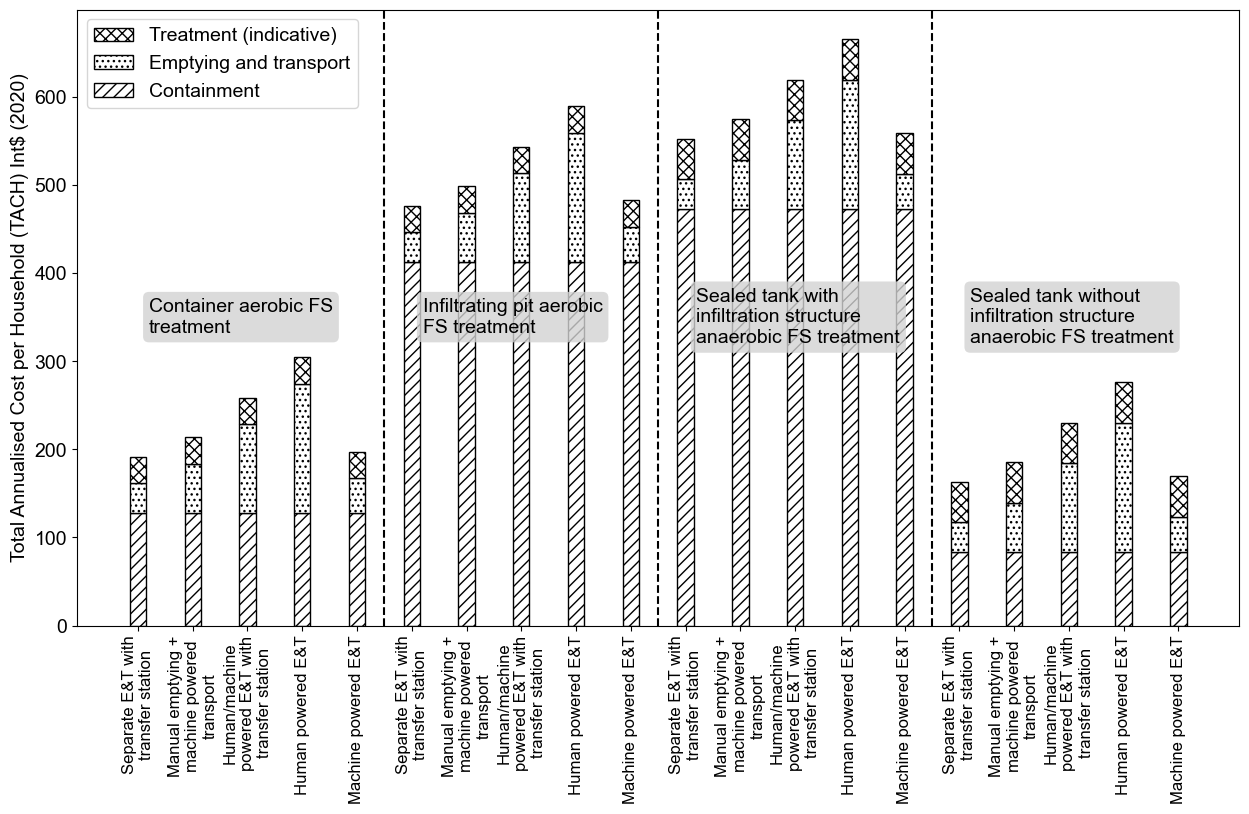

In [56]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

fig.patch.set_facecolor('white') # 背景色を「白」に設定

hatches = ['///', '...', 'xxx'] 
labels = []

bottom = None
total = np.zeros(len(df))
for i, column in enumerate(df.columns[3:]):
    bar = ax.bar(
        df.iloc[:, 0], 
        df[column], 
        width=0.3,
        color='w', 
        edgecolor='k', 
        bottom=bottom, 
        label=column, 
        hatch=hatches[i % len(hatches)]
    )
    bottom = df[column] if bottom is None else bottom + df[column]
    total += df[column]
    labels.append(column)


# Create vertical line by "Container type"
container_types = df['Container type'].unique()
for i, container_type in enumerate(container_types):
    ax.text(
        i * 5 + 0.2, 
        350, 
        '\n'.join(textwrap.wrap(container_type, 25)), 
        ha='left', 
        va='center', 
        fontsize=14,
        bbox=dict(facecolor='lightgray', edgecolor='none', alpha=0.8, boxstyle='round')
    )
    if i > 0:
        position = i * 5 - 0.5
        ax.axvline(x=position, color='k', linestyle='--')
    
# create legend with reversed order
ax.legend(loc='upper left')
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left')

xtick_labels = [ '\n'.join(textwrap.wrap(label, 20)) for label in df['Emptying type'].tolist()]
ax.set_xticks(range(len(xtick_labels)))

ax.set_xticklabels(xtick_labels, rotation=90, ha='center', fontsize=12)

ax.set_ylabel('Total Annualised Cost per Household (TACH) Int$ (2020)', fontsize=14)

plt.savefig(file_path, format="pdf", dpi=dpi, transparent=True, bbox_inches='tight')
plt.show()